In [ ]:
# X = np.array([
#     [1,1],
#     [1.5,1.5],
#     [5,5],
#     [3,4],
#     [4,4],
#     [3,3.5],])

# prespecified_dist = {'A': [0, 0.71, 5.66, 3.61, 4.24, 3.2],
#                      'B': [0.71, 0, 4.95, 2.92, 3.54, 2.5],
#                      'C': [5.66, 4.95, 0, 2.24, 1.41, 2.5],
#                      'D': [3.61, 2.92, 2.24, 0, 1, 0.5],
#                      'E': [4.24, 3.54, 1.41, 1, 0, 1.12],
#                      'F': [3.20, 2.50, 2.50, 0.5, 1.12, 0]}
# prespecified_df = pd.DataFrame(prespecified_dist, index=["A","B","C","D","E","F"]) 

In [ ]:
import numpy as np
import pandas as pd
import string

# change point
# change link
# change metric
# change label range
X = np.array([
    [7, 0],
    [10, 0],
    [20, 0],
    [28, 0],
    [35, 0],])

# # change link
# # prespecified_dist
# # Data from left to right, see 0 go down 
# prespecified_dist = {'P1': [0, 9, 3, 6, 11],
#                      'P2': [9, 0, 7, 5, 10],
#                      'P3': [3, 7, 0, 9, 2],
#                      'P4': [6, 5, 9, 0, 8],
#                      'P5': [11, 10, 2, 8, 0]}
# # prespecified_df = pd.DataFrame(prespecified_dist, index=list(prespecified_dist)) 
# prespecified_df = pd.DataFrame(prespecified_dist, index=["P1", "P2", "P3", "P4", "P5"]) 

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html 
# It can be
# single 
# complete 
# average 
# weighted 
# centroid 
# median 
# ward
change_link = "complete"

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist 
# The distance metric to use. 
# The distance function can be 
# ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, 
# ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, 
# ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, 
# ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’ 
change_metric = "euclidean"

if ('prespecified_dist' not in globals()) or ('prespecified_dist' not in locals()):
  # change label range 
  # It can be 
  # A-Z 
  # P
  # A
  # 0-N
  # 1-N
  label_range = "A-Z"

  if label_range == "A-Z":
    # Label range A-Z
    labelList =[]
    for i in range(ord(string.ascii_uppercase[0]), ord(string.ascii_uppercase[len(X) - 1])+1):
        labelList.append(chr(i))
  elif label_range == "P":
    # Label range P 
    labelList =[]
    for i in range(1, len(X) + 1):
        label_name = "P" + str(i)
        labelList.append(label_name)
  elif label_range == "A":
    # Label range A 
    labelList =[]
    for i in range(1, len(X) + 1):
        label_name = "A" + str(i)
        labelList.append(label_name)
  elif label_range == "0-N":
    # Label range 0-N 
    labelList =[]
    for i in range(0, len(X)):
        label_name = str(i)
        labelList.append(label_name)
  elif label_range == "1-N":
    # Label range 0-N 
    labelList =[]
    for i in range(1, len(X) + 1):
        label_name = str(i)
        labelList.append(label_name)

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

if ('prespecified_dist' not in globals()) or ('prespecified_dist' not in locals()):
  # https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/ 
  # The euclidean dist matrix DataFrame 
  # copy DataFrame to table 
  from scipy.spatial.distance import squareform, pdist
  dist_matrix_df = pd.DataFrame(squareform(pdist(X, metric=change_metric)), columns=labelList, index=labelList) 
else:
  dist_matrix_df = prespecified_df 
print("Distance Matrix: ")
display(dist_matrix_df)
print("\n")
print("\n")
count_combination = 1
while True:
  print("Combination " + str(count_combination) + ": ")
  count_combination = count_combination + 1
  try:
    # get min in dataframe 
    # remove 0 in list 
    dist_matrix_list = dist_matrix_df.values.tolist() 
    for sub_list in dist_matrix_list:
      sub_list.remove(0)
    # get min in sub_list 
    min_list = []
    for sub_list in dist_matrix_list:
      min_list.append(min(sub_list))
    # get min in min_list 
    min_dist = min(min_list)
    # get min_dist position 
    # https://stackoverflow.com/questions/49669667/pandas-return-cell-position-containing-string 
    d = dict(zip(dist_matrix_df.columns, dist_matrix_df.index))
    s = dist_matrix_df.rename(columns=d).stack()
    min_dist_position = s[(s == min_dist)].index.tolist()
    print("\nThe min dist is at ")
    print(min_dist_position)
    # Combine two point in row and two point in column 
    # https://stackoverflow.com/questions/34238391/convert-one-dataframe-row-to-flat-list 
    first_row_pos = min_dist_position[0][0]
    second_row_pos = min_dist_position[1][0]
    first_row_list = dist_matrix_df.loc[[first_row_pos], :].values.tolist()[0]
    second_row_list = dist_matrix_df.loc[[second_row_pos], :].values.tolist()[0]
    combine_list = []
    if change_link == "single":
      print("\nThe single link is to find the min of combination ") 
      for i in range(len(first_row_list)):
        col_list = dist_matrix_df.columns.values.tolist()
        if (first_row_list[i] != 0) and (second_row_list[i] != 0):
          print("Min (" + str(first_row_pos) + "->" + str(col_list[i]) + ", " + str(second_row_pos) + "->" + str(col_list[i]) + ") = ", end="")
          print("Min (" + str(round(first_row_list[i], 2)) + ", " + str(round(second_row_list[i], 2)) + "). ", end="") 
          combine_list.append(min(first_row_list[i], second_row_list[i])) 
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(round(min(first_row_list[i], second_row_list[i]), 2))) 
        else:
          print("Combine " + str(first_row_pos) + str(second_row_pos) + ". ", end="")
          # If it contain 0, it is itself, so append 0 
          combine_list.append(0)
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(0)) 
    elif change_link == "complete":
      print("\nThe complete link is to find the max of combination ") 
      for i in range(len(first_row_list)):
        col_list = dist_matrix_df.columns.values.tolist()
        if (first_row_list[i] != 0) and (second_row_list[i] != 0):
          print("Max (" + str(first_row_pos) + "->" + str(col_list[i]) + ", " + str(second_row_pos) + "->" + str(col_list[i]) + ") = ", end="")
          print("Max (" + str(round(first_row_list[i], 2)) + ", " + str(round(second_row_list[i], 2)) + "). ", end="")
          combine_list.append(max(first_row_list[i], second_row_list[i])) 
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(round(max(first_row_list[i], second_row_list[i]), 2))) 
        else:
          print("Combine " + str(first_row_pos) + str(second_row_pos) + ". ", end="")
          # If it contain 0, it is itself, so append 0 
          combine_list.append(0)
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(0)) 
    elif change_link == "average":
      print("\nThe average link is to find the average of combination ") 
      for i in range(len(first_row_list)):
        col_list = dist_matrix_df.columns.values.tolist()
        if (first_row_list[i] != 0) and (second_row_list[i] != 0):
          print("Avg (" + str(first_row_pos) + "->" + str(col_list[i]) + ", " + str(second_row_pos) + "->" + str(col_list[i]) + ") = ", end="")
          print("Avg (" + str(round(first_row_list[i], 2)) + ", " + str(round(second_row_list[i], 2)) + "). ", end="") 
          combine_list.append((first_row_list[i] + second_row_list[i]) / 2)
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(round((first_row_list[i] + second_row_list[i]) / 2, 2)))  
        else:
          print("Combine " + str(first_row_pos) + str(second_row_pos) + ". ", end="")
          # If it contain 0, it is itself, so append 0 
          combine_list.append(0)
          print("So " + str(first_row_pos) + str(second_row_pos) + "->" + str(col_list[i]) + " is " + str(0)) 
    first_point_index = dist_matrix_df.index.to_list().index(first_row_pos)
    # Remove the second 0 
    combine_list.reverse()
    combine_list.remove(0)
    combine_list.reverse()

    # # Replace duplicate with 0 
    # # The duplicate in single link is 0, replace 0 with 0
    # # The duplicate in complete is not 0, replace number with 0 
    # # Remove the second 0 in combine_list 
    # # The list replace is working with str 
    # # Convert list of float to list of string 
    # # https://www.kite.com/python/answers/how-to-convert-all-items-in-a-list-to-floats-in-python 
    # list_of_str = []
    # for item in combine_list:
    #   list_of_str.append(str(item))
    # # Get the duplicate number 
    # # https://www.techiedelight.com/find-duplicate-items-python-list/ 
    # nums = list_of_str
    # visited = set()
    # dup = {x for x in nums if x in visited or (visited.add(x) or False)}
    # dup = dup.pop()
    # # Replace duplicate with 0 
    # # https://appdividend.com/2020/05/13/python-list-replace-replace-string-integer-in-list/
    # list_of_str_replace = [item.replace(str(dup), "0") for item in list_of_str] 
    # # Convert list of string to list of float 
    # # https://www.kite.com/python/answers/how-to-convert-all-items-in-a-list-to-floats-in-python 
    # list_of_floats = []
    # for item in list_of_str_replace:
    #     list_of_floats.append(float(item))
    # # Remove the second 0 
    # # https://www.guru99.com/python-howto-remove-duplicates.html 
    # my_list = list_of_floats 
    # my_finallist = []
    # [my_finallist.append(n) for n in my_list if n not in my_finallist] 
    # combine_list=my_finallist 

    # Remove two row      
    dist_matrix_df.drop(labels=[second_row_pos], axis=0, inplace=True)
    # Remove two column
    dist_matrix_df.drop(labels=[second_row_pos], axis=1, inplace=True)

    # Replace column 
    dist_matrix_df[first_row_pos] = combine_list 
    dist_matrix_df = dist_matrix_df.rename(columns={str(first_row_pos): str(first_row_pos) + str(second_row_pos)})
    # Replace row 
    dist_matrix_df.iloc[first_point_index] = combine_list 
    dist_matrix_df = dist_matrix_df.rename(index={str(first_row_pos): str(first_row_pos) + str(second_row_pos)})
    print("\n")
    display(dist_matrix_df)
    print("\n")
    print("\n")
  except:
    break

<IPython.core.display.Javascript object>

Distance Matrix: 


A     B     C     D     E
A   0.0   3.0  13.0  21.0  28.0
B   3.0   0.0  10.0  18.0  25.0
C  13.0  10.0   0.0   8.0  15.0
D  21.0  18.0   8.0   0.0   7.0
E  28.0  25.0  15.0   7.0   0.0





Combination 1: 

The min dist is at 
[('A', 'B'), ('B', 'A')]

The complete link is to find the max of combination 
Combine AB. So AB->A is 0
Combine AB. So AB->B is 0
Max (A->C, B->C) = Max (13.0, 10.0). So AB->C is 13.0
Max (A->D, B->D) = Max (21.0, 18.0). So AB->D is 21.0
Max (A->E, B->E) = Max (28.0, 25.0). So AB->E is 28.0




AB     C     D     E
AB   0.0  13.0  21.0  28.0
C   13.0   0.0   8.0  15.0
D   21.0   8.0   0.0   7.0
E   28.0  15.0   7.0   0.0





Combination 2: 

The min dist is at 
[('D', 'E'), ('E', 'D')]

The complete link is to find the max of combination 
Max (D->AB, E->AB) = Max (21.0, 28.0). So DE->AB is 28.0
Max (D->C, E->C) = Max (8.0, 15.0). So DE->C is 15.0
Combine DE. So DE->D is 0
Combine DE. So DE->E is 0




AB     C    DE
AB   0.0  13.0  28.0
C   13.0   0.0  15.0
DE  28.0  15.0   0.0





Combination 3: 

The min dist is at 
[('AB', 'C'), ('C', 'AB')]

The complete link is to find the max of combination 
Combine ABC. So ABC->AB is 0
Combine ABC. So ABC->C is 0
Max (AB->DE, C->DE) = Max (28.0, 15.0). So ABC->DE is 28.0




ABC    DE
ABC   0.0  28.0
DE   28.0   0.0





Combination 4: 

The min dist is at 
[('ABC', 'DE'), ('DE', 'ABC')]

The complete link is to find the max of combination 
Combine ABCDE. So ABCDE->ABC is 0
Combine ABCDE. So ABCDE->DE is 0




ABCDE
ABCDE      0





Combination 5: 


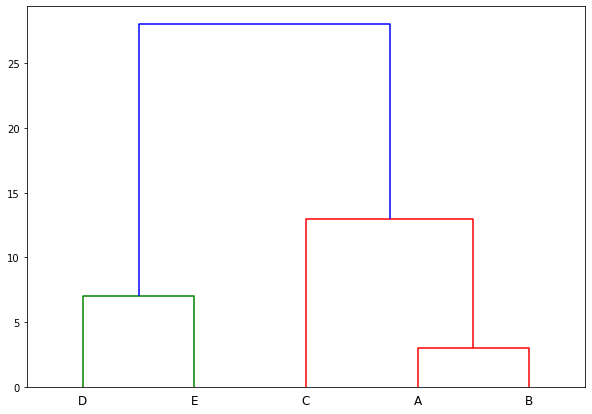

In [ ]:
if ('prespecified_dist' not in globals()) or ('prespecified_dist' not in locals()):
  from scipy.cluster.hierarchy import dendrogram, linkage
  from matplotlib import pyplot as plt

  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist 
  # The distance metric to use. 
  # The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, 
  # ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, 
  # ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, 
  # ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’
  linked = linkage(X, change_link, metric=change_metric)

  plt.figure(figsize=(10, 7))
  dendrogram(linked,
              orientation='top',
              labels=labelList,
              distance_sort='descending',
              show_leaf_counts=True)
  plt.show()